In [1]:
pip install pandas scikit-learn pmlb matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


--- Step 1: Data Loaded Successfully ---
Dataset shape: (462, 10)
Cleaned column names: ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'target']
   sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  \
0  160    12.00  5.73      23.11        1     49    25.30    97.20   52   
1  144     0.01  4.41      28.61        0     55    28.87     2.06   63   
2  118     0.08  3.48      32.28        1     52    29.14     3.81   46   
3  170     7.50  6.41      38.03        1     51    31.99    24.26   58   
4  134    13.60  3.50      27.78        1     60    25.99    57.34   49   

   target  
0       1  
1       1  
2       0  
3       1  
4       1  


--- Step 2: Preprocessing and Splitting Complete ---
Training set size: 346
Testing set size: 116

--- Step 3: Model Training Complete ---

--- Step 4: Model Evaluation ---
Model Accuracy: 0.7500

Classification Report:
                  precision    recall  f1-score   support

No Heart D

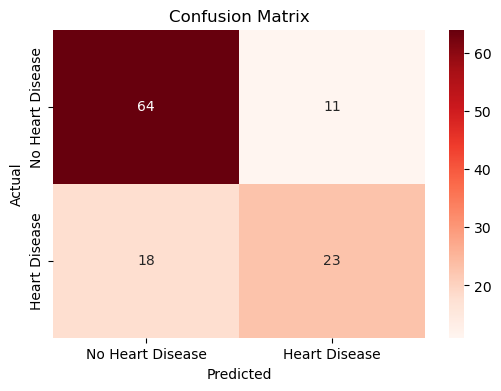

In [3]:
import pandas as pd
from pmlb import fetch_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # --- Step 1: Load the Data ---
    df = fetch_data('saheart')
    
    # --- FIX: Standardize all column names to lowercase ---
    df.columns = df.columns.str.lower()
    
    print("--- Step 1: Data Loaded Successfully ---")
    print("Dataset shape:", df.shape)
    print("Cleaned column names:", df.columns.tolist())
    print(df.head())
    print("\n")

    # --- Step 2: Preprocess and Split the Data ---
    # This line now works because 'famhist' is lowercase
    df = pd.get_dummies(df, columns=['famhist'], drop_first=True)
    
    # Split data into features (X) and target (y)
    X = df.drop('target', axis=1)
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print("--- Step 2: Preprocessing and Splitting Complete ---")
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Testing set size: {X_test.shape[0]}\n")

    # --- Step 3: Train the Logistic Regression Model ---
    model = LogisticRegression(random_state=42)
    model.fit(X_train_scaled, y_train)
    print("--- Step 3: Model Training Complete ---\n")

    # --- Step 4: Evaluate the Model ---
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)

    print("--- Step 4: Model Evaluation ---")
    print(f"Model Accuracy: {accuracy:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease']))
    
    # Generate and save the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                xticklabels=['No Heart Disease', 'Heart Disease'],
                yticklabels=['No Heart Disease', 'Heart Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig('heart_disease_confusion_matrix.png')
    print("\nConfusion matrix saved as 'heart_disease_confusion_matrix.png'")
    print("\n--- Analysis Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")